In [ ]:
! pip install torch diffusers matplotlib transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch

In [ ]:
x = torch.tensor([1.0,2.0,3.0])
y = torch.ones(3)
z = x + y
print(z)

tensor([2., 3., 4.])


In [ ]:
print(x.shape, x.size(), x.dtype)

torch.Size([3]) torch.Size([3]) torch.float32


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = x.to(device)

In [ ]:
import torch.nn as nn
class SimpleModel(nn.Module):
  def __init__(self):
    super(SimpleModel, self).__init__()
    self.linear = nn.Linear(2,1)

In [ ]:
model = SimpleModel()
criteron = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(2, 1)  # Linear layer with 2 input features, 1 output

    def forward(self, x):
        return self.linear(x)  # Forward pass through the linear layer

# Instantiate the model
model = SimpleModel()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(10):
    optimizer.zero_grad()

    # Forward pass
    output = model(torch.tensor([[1.0, 2.0]], dtype=torch.float32))

    # Compute loss
    loss = criterion(output, torch.tensor([[1.0]], dtype=torch.float32))

    # Backward pass
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch}, Loss: {loss.item()}")


Epoch 0, Loss: 1.1001204252243042
Epoch 1, Loss: 0.8519332408905029
Epoch 2, Loss: 0.6597371101379395
Epoch 3, Loss: 0.5109003782272339
Epoch 4, Loss: 0.3956412374973297
Epoch 5, Loss: 0.3063846230506897
Epoch 6, Loss: 0.2372642606496811
Epoch 7, Loss: 0.18373741209506989
Epoch 8, Loss: 0.1422862708568573
Epoch 9, Loss: 0.11018653213977814


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

data = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

targets = torch.tensor([[1.0],[0.0]])

dataset = TensorDataset(data, targets)

loader = DataLoader(dataset, batch_size = 1, shuffle= True)

for batch in loader:
  print(batch)

[tensor([[1., 2.]]), tensor([[1.]])]
[tensor([[3., 4.]]), tensor([[0.]])]


In [ ]:
scripted_model = torch.jit.script(model)

print(scripted_model)

scripted_model.save("scripted_model.pt")
loaded_model = torch.jit.load("scripted_model.pt")

print(loaded_model)

RecursiveScriptModule(
  original_name=SimpleModel
  (linear): RecursiveScriptModule(original_name=Linear)
)
RecursiveScriptModule(
  original_name=SimpleModel
  (linear): RecursiveScriptModule(original_name=Linear)
)


In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

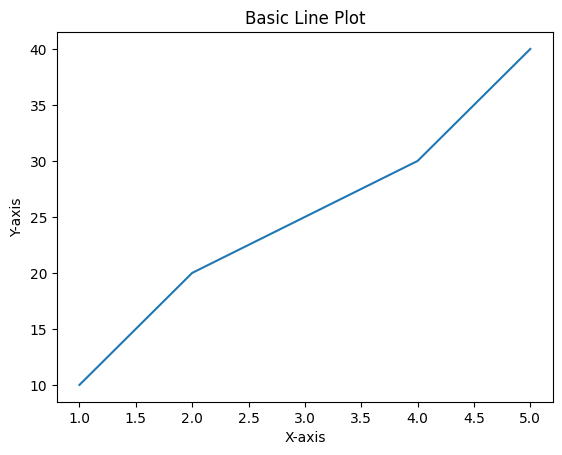

In [ ]:
x = [1,2,3,4,5]
y = [10,20,25,30,40]
plt.plot(x,y)
plt.title("Basic Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

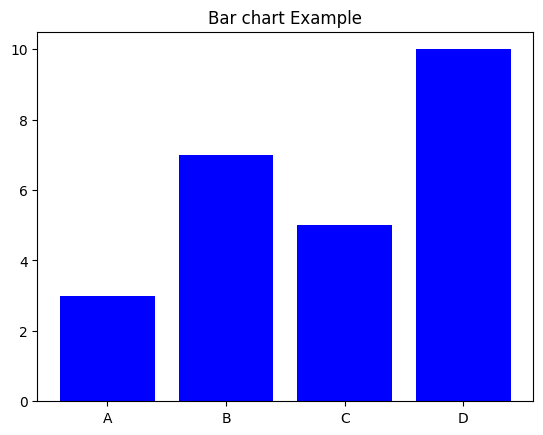

In [ ]:
categories = ['A','B','C','D']

values = [3,7,5,10]

plt.bar(categories,values,color='blue')
plt.title("Bar chart Example")
plt.show()

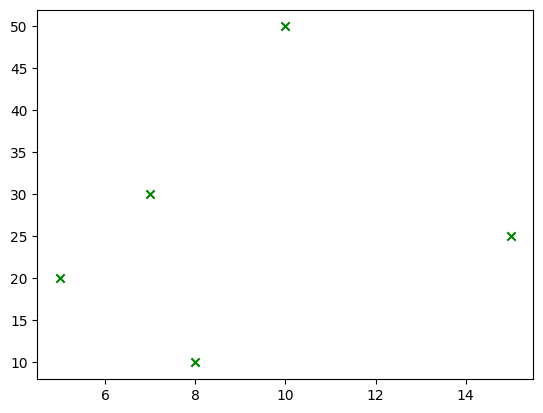

In [ ]:
x = [5,7,8,10,15]
y = [20,30,10,50,25]

plt.scatter(x,y,color = 'green' , marker = 'x')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

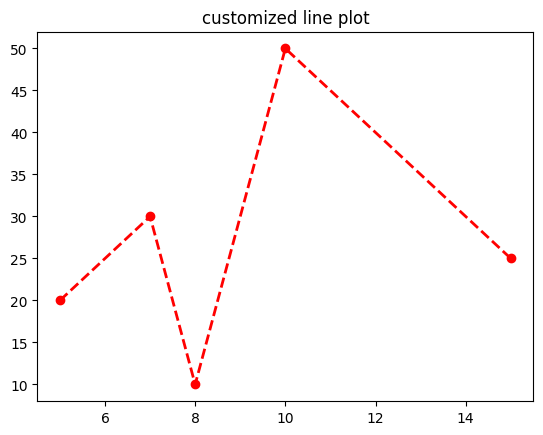

In [ ]:
plt.plot(x,y,color= "red" , linestyle= '--' , marker = 'o', linewidth=2)
plt.title("customized line plot")
plt.show

In [6]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

In [7]:
authorization_token = ""
modelid = "CompVis/stable-diffusion-v1-4"
device = "cuda"

In [8]:
import torch

print("CUDA Available:", torch.cuda.is_available())  # Should be True
print("Number of GPUs:", torch.cuda.device_count())  # Should be > 0 if GPU is available
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")
print("CUDA Version:", torch.version.cuda)  # Should not be None


CUDA Available: False
Number of GPUs: 0
GPU Name: No GPU
CUDA Version: 12.4


In [12]:
pipe = StableDiffusionPipeline.from_pretrained(
    modelid, revision="fp16", torch_dtype=torch.float16, use_auth_token=authorization_token
)
pipe.to(device)


Keyword arguments {'use_auth_token': ''} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommende

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [11]:
from diffusers import StableDiffusionPipeline
import torch

# Load the model in float32 precision for CPU
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float32  # Change to float32 for CPU
)

# Use CPU since no GPU is detected
device = "cpu"
pipe.to(device)

print("Stable Diffusion running on:", device)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Stable Diffusion running on: cpu


In [ ]:
with autocast(device):
  textprompt = str(input("Enter your prompt: "))

  image = pipe(textprompt, guidance_scale=8.5).images[0]

  imgplot = plt.imshow(image)

Enter your prompt: a blue car


RuntimeError: mixed dtype (CPU): expect parameter to have scalar type of Float

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Enter your prompt: a blue car


  0%|          | 0/50 [00:00<?, ?it/s]

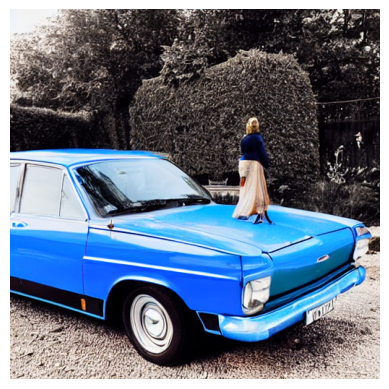

In [14]:
import torch
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline

# Load the model in float32 (to prevent mixed dtype issues)
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Convert all model parameters to float32 for CPU compatibility
pipe.to(torch.float32)

# Force CPU usage
device = "cpu"
pipe.to(device)

# Get user input for the text prompt
textprompt = input("Enter your prompt: ")

# Generate the image with correct precision
image = pipe(textprompt, guidance_scale=8.5).images[0]

# Display the image
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()